# Covid-19 Open Data Analysis

Comprehensive analysis of COVID-19 pandemic data from BigQuery public datasets, exploring daily case trends, mortality rates, geographic patterns, and decline trajectories across multiple countries from 2020-2022.

**COVID-19 Daily New Cases: 7-Day Moving Average Analysis**

Time-series analysis of COVID-19 daily new cases using 7-day moving averages from 2020-2022,
tracking the pandemic's progression through multiple waves. Peak cases reached 778,354 on
January 16, 2022 (Omicron wave). Features wave identification (First Wave, Delta, Omicron),
monthly aggregations, and comparative statistics showing the dramatic surge from initial
outbreak through various variant waves, with detailed breakdowns by period and yearly trends.

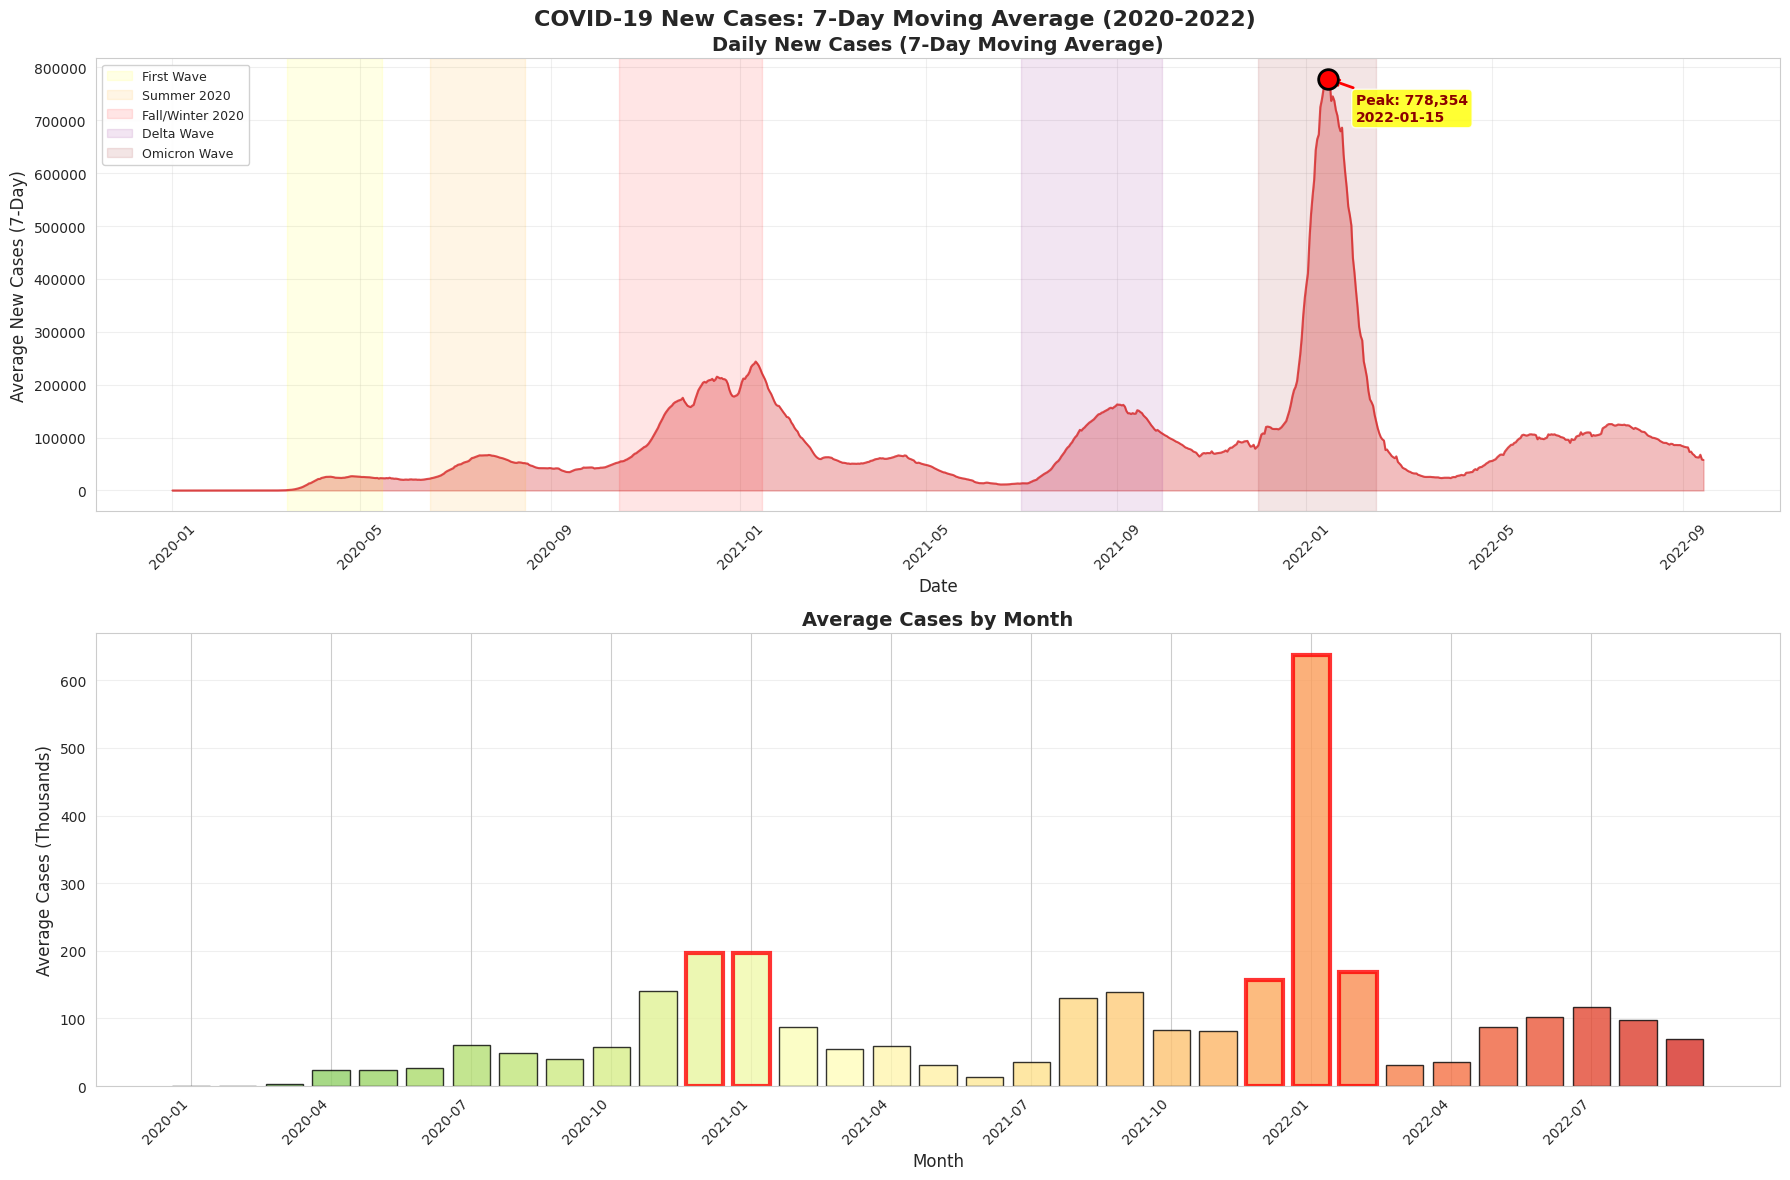


COVID-19 DAILY NEW CASES SUMMARY (7-DAY MOVING AVERAGE)
Analysis Period: 2020-01-01 to 2022-09-14
Total Days: 988

Overall Statistics:
  Average Daily Cases: 92,733.85
  Median Daily Cases: 62,716.79
  Peak Cases: 778,354.14
  Minimum Cases: 0.00
  Standard Deviation: 116,929.87

Peak Information:
  Date: 2022-01-15
  Cases: 778,354.14

MAJOR WAVES ANALYSIS

First Wave (Mar-May 2020):
  Average Cases:       16,969
  Peak Cases:          27,062
  Peak Date: 2020-04-26

Summer 2020 (Jun-Aug):
  Average Cases:       45,546
  Peak Cases:          67,250
  Peak Date: 2020-07-23

Fall/Winter 2020 (Sep-Jan):
  Average Cases:      126,655
  Peak Cases:         243,934
  Peak Date: 2021-01-11

Spring 2021 (Feb-Jun):
  Average Cases:       48,688
  Peak Cases:         138,464
  Peak Date: 2021-02-01

Delta Wave (Jul-Sep 2021):
  Average Cases:      101,375
  Peak Cases:         162,748
  Peak Date: 2021-09-01

Fall 2021 (Oct-Nov):
  Average Cases:       82,092
  Peak Cases:         106,231
  Pe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('00_daily_growth_rate_7Day_MA.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('COVID-19 New Cases: 7-Day Moving Average (2020-2022)', fontsize=16, fontweight='bold')

# Plot 1: Time Series - Full Timeline
ax1 = axes[0]
ax1.plot(df['date'], df['avg_new_cases_7d'],
         linewidth=1.5, color='#d62728', alpha=0.8)
ax1.fill_between(df['date'], df['avg_new_cases_7d'],
                  alpha=0.3, color='#d62728')

ax1.set_title('Daily New Cases (7-Day Moving Average)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average New Cases (7-Day)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add major wave annotations
waves = [
    ('First Wave', '2020-03-15', '2020-05-15', 'yellow'),
    ('Summer 2020', '2020-06-15', '2020-08-15', 'orange'),
    ('Fall/Winter 2020', '2020-10-15', '2021-01-15', 'red'),
    ('Delta Wave', '2021-07-01', '2021-09-30', 'purple'),
    ('Omicron Wave', '2021-12-01', '2022-02-15', 'darkred')
]

for wave_name, start, end, color in waves:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end),
                alpha=0.1, color=color, label=wave_name)

# Find and mark peak
peak_idx = df['avg_new_cases_7d'].idxmax()
peak_date = df.loc[peak_idx, 'date']
peak_value = df.loc[peak_idx, 'avg_new_cases_7d']

ax1.scatter(peak_date, peak_value, color='red', s=200, zorder=5,
            edgecolor='black', linewidth=2)
ax1.annotate(f'Peak: {peak_value:,.0f}\n{peak_date.strftime("%Y-%m-%d")}',
            xy=(peak_date, peak_value),
            xytext=(20, -30), textcoords='offset points',
            fontsize=10, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax1.legend(loc='upper left', fontsize=9, framealpha=0.9)

# Plot 2: Monthly Average Bar Chart
ax2 = axes[1]
monthly_avg = df.groupby('year_month')['avg_new_cases_7d'].mean().reset_index()
monthly_avg['date_label'] = monthly_avg['year_month'].astype(str)

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(monthly_avg)))
bars = ax2.bar(range(len(monthly_avg)), monthly_avg['avg_new_cases_7d'] / 1000,
               color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax2.set_title('Average Cases by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average Cases (Thousands)', fontsize=12)
ax2.set_xticks(range(0, len(monthly_avg), 3))
ax2.set_xticklabels(monthly_avg['date_label'].iloc[::3], rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Highlight top 5 months
top_5_indices = monthly_avg.nlargest(5, 'avg_new_cases_7d').index
for idx in top_5_indices:
    if idx < len(bars):
        bars[idx].set_edgecolor('red')
        bars[idx].set_linewidth(3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("COVID-19 DAILY NEW CASES SUMMARY (7-DAY MOVING AVERAGE)")
print("="*80)
print(f"Analysis Period: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Total Days: {len(df):,}")

print(f"\nOverall Statistics:")
print(f"  Average Daily Cases: {df['avg_new_cases_7d'].mean():,.2f}")
print(f"  Median Daily Cases: {df['avg_new_cases_7d'].median():,.2f}")
print(f"  Peak Cases: {df['avg_new_cases_7d'].max():,.2f}")
print(f"  Minimum Cases: {df['avg_new_cases_7d'].min():,.2f}")
print(f"  Standard Deviation: {df['avg_new_cases_7d'].std():,.2f}")

print(f"\nPeak Information:")
print(f"  Date: {peak_date.strftime('%Y-%m-%d')}")
print(f"  Cases: {peak_value:,.2f}")

print("\n" + "="*80)
print("MAJOR WAVES ANALYSIS")
print("="*80)

wave_stats = [
    ("First Wave (Mar-May 2020)", "2020-03-01", "2020-05-31"),
    ("Summer 2020 (Jun-Aug)", "2020-06-01", "2020-08-31"),
    ("Fall/Winter 2020 (Sep-Jan)", "2020-09-01", "2021-01-31"),
    ("Spring 2021 (Feb-Jun)", "2021-02-01", "2021-06-30"),
    ("Delta Wave (Jul-Sep 2021)", "2021-07-01", "2021-09-30"),
    ("Fall 2021 (Oct-Nov)", "2021-10-01", "2021-11-30"),
    ("Omicron Wave (Dec-Feb)", "2021-12-01", "2022-02-28"),
    ("Spring 2022 (Mar-May)", "2022-03-01", "2022-05-31"),
    ("Summer 2022 (Jun-Sep)", "2022-06-01", "2022-09-14")
]

for wave_name, start, end in wave_stats:
    wave_data = df[(df['date'] >= start) & (df['date'] <= end)]
    if len(wave_data) > 0:
        print(f"\n{wave_name}:")
        print(f"  Average Cases: {wave_data['avg_new_cases_7d'].mean():>12,.0f}")
        print(f"  Peak Cases: {wave_data['avg_new_cases_7d'].max():>15,.0f}")
        print(f"  Peak Date: {wave_data.loc[wave_data['avg_new_cases_7d'].idxmax(), 'date'].strftime('%Y-%m-%d')}")

print("\n" + "="*80)
print("TOP 10 HIGHEST CASE DAYS")
print("="*80)
top_10 = df.nlargest(10, 'avg_new_cases_7d')
print(f"{'Rank':<6} {'Date':<15} {'Cases (7-Day Avg)':<20}")
print("-"*80)
for i, (_, row) in enumerate(top_10.iterrows(), 1):
    print(f"#{i:<5} {row['date'].strftime('%Y-%m-%d'):<15} {row['avg_new_cases_7d']:>18,.2f}")

print("\n" + "="*80)
print("YEARLY COMPARISON")
print("="*80)
yearly_stats = df.groupby(df['date'].dt.year)['avg_new_cases_7d'].agg(['mean', 'max', 'min'])
print(f"{'Year':<6} {'Average':<15} {'Peak':<15} {'Minimum':<15}")
print("-"*80)
for year, row in yearly_stats.iterrows():
    print(f"{int(year):<6} {row['mean']:>13,.0f} {row['max']:>13,.0f} {row['min']:>13,.2f}")

print("="*80)

**Monthly COVID-19 Case Growth Analysis by Country (2020-2022)**

Comparative analysis of monthly COVID-19 cases across five countries (Brazil, India, Philippines,
Russia, United States) from 2020-2022. Features time-series tracking of case progression and
growth rate heatmap visualization. United States leads with 60.2M peak (Jan 2022), followed by
India's 26.1M (May 2021). Highlights major pandemic waves (First Wave, Delta, Omicron) and
month-over-month growth patterns, revealing dramatic surge during Omicron variant (Jan 2022)
with extreme growth rates across all countries.

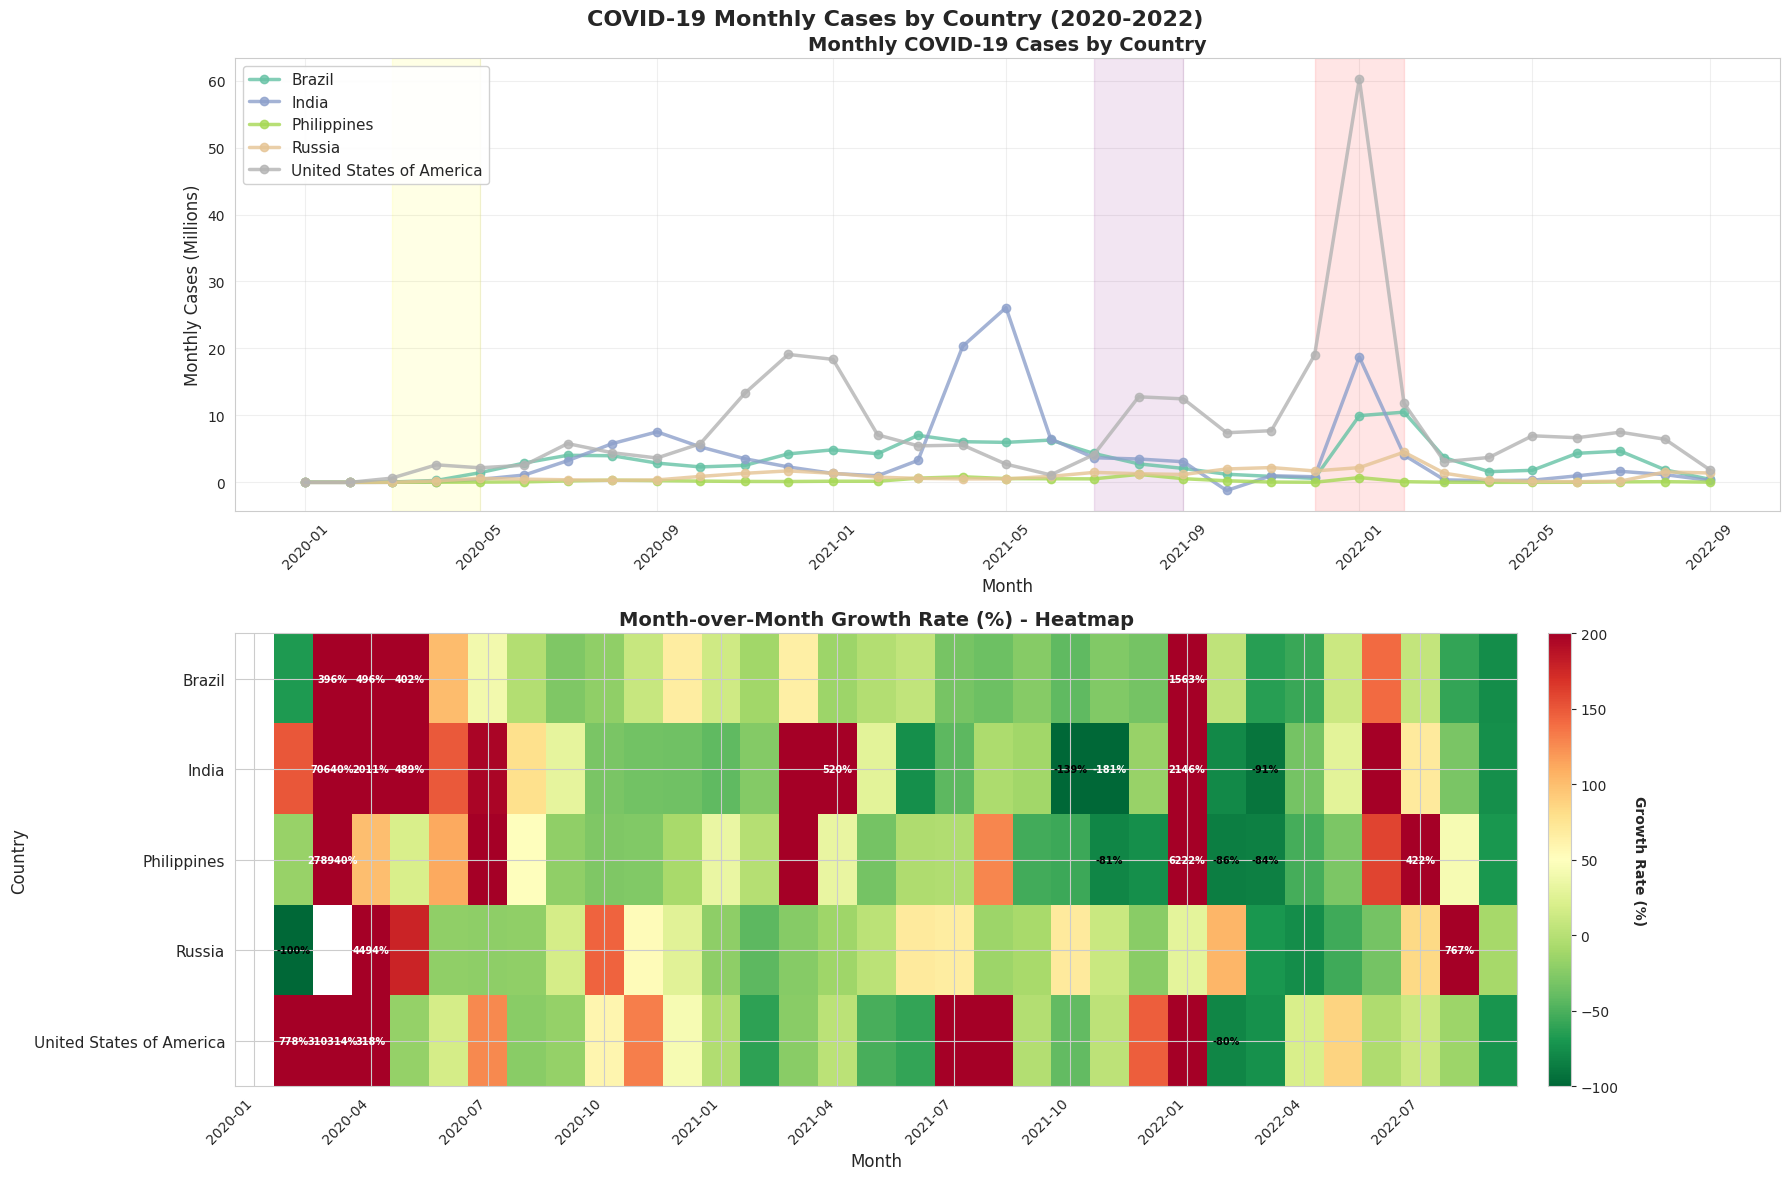


COVID-19 MONTHLY CASES SUMMARY BY COUNTRY

BRAZIL
------------------------------------------------------------------------------------------
  Analysis Period: 2020-01 to 2022-09
  Total Months: 33
  Total Cases:     109,948,210
  Average Monthly Cases:    3,331,764
  Peak Month Cases:      10,485,932 (2022-02)
  Average Growth Rate:          85.33%
  Highest Growth Rate:        1562.90% (2022-01)
  Largest Decline:             -76.27% (2022-09)

INDIA
------------------------------------------------------------------------------------------
  Analysis Period: 2020-01 to 2022-09
  Total Months: 33
  Total Cases:     126,463,452
  Average Monthly Cases:    3,832,226
  Peak Month Cases:      26,098,471 (2021-05)
  Average Growth Rate:        2375.89%
  Highest Growth Rate:       70640.00% (2020-03)
  Largest Decline:            -181.49% (2021-11)

PHILIPPINES
------------------------------------------------------------------------------------------
  Analysis Period: 2020-01 to 2022-09


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('01_monthly_case_growth_per_country.csv')

# Convert month to datetime
df['month'] = pd.to_datetime(df['month'])

# Set style
sns.set_style("whitegrid")

# Get unique countries
countries = df['country_name'].unique()

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('COVID-19 Monthly Cases by Country (2020-2022)', fontsize=16, fontweight='bold')

# Plot 1: Monthly Cases - All Countries
ax1 = axes[0]
colors = plt.cm.Set2(np.linspace(0, 1, len(countries)))

for i, country in enumerate(countries):
    country_data = df[df['country_name'] == country]
    ax1.plot(country_data['month'], country_data['monthly_cases'] / 1e6,
             marker='o', label=country, linewidth=2.5, markersize=6,
             color=colors[i], alpha=0.8)

ax1.set_title('Monthly COVID-19 Cases by Country', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Monthly Cases (Millions)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add major wave markers
ax1.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-05'),
            alpha=0.1, color='yellow', label='First Wave')
ax1.axvspan(pd.to_datetime('2021-07'), pd.to_datetime('2021-09'),
            alpha=0.1, color='purple', label='Delta Wave')
ax1.axvspan(pd.to_datetime('2021-12'), pd.to_datetime('2022-02'),
            alpha=0.1, color='red', label='Omicron Wave')

# Plot 2: Heatmap of Growth Rates
ax2 = axes[1]

# Pivot data for heatmap
pivot_data = df.pivot(index='country_name', columns='month', values='growth_rate')

# Create heatmap
im = ax2.imshow(pivot_data.values, cmap='RdYlGn_r', aspect='auto',
                vmin=-100, vmax=200, interpolation='nearest')

# Set ticks
ax2.set_yticks(range(len(pivot_data.index)))
ax2.set_yticklabels(pivot_data.index, fontsize=11)

# Set x-axis with every 3rd month
month_labels = pivot_data.columns.strftime('%Y-%m')
x_tick_positions = range(0, len(month_labels), 3)
ax2.set_xticks(x_tick_positions)
ax2.set_xticklabels([month_labels[i] for i in x_tick_positions], rotation=45, ha='right')

ax2.set_title('Month-over-Month Growth Rate (%) - Heatmap', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Country', fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2, orientation='vertical', pad=0.02)
cbar.set_label('Growth Rate (%)', rotation=270, labelpad=20, fontweight='bold')

# Add text annotations for extreme values
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        value = pivot_data.values[i, j]
        if pd.notna(value) and (abs(value) > 300 or value < -80):
            text_color = 'white' if abs(value) > 150 else 'black'
            ax2.text(j, i, f'{value:.0f}%',
                    ha="center", va="center", color=text_color,
                    fontsize=7, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*90)
print("COVID-19 MONTHLY CASES SUMMARY BY COUNTRY")
print("="*90)

for country in countries:
    country_data = df[df['country_name'] == country]
    print(f"\n{country.upper()}")
    print("-"*90)
    print(f"  Analysis Period: {country_data['month'].min().strftime('%Y-%m')} to {country_data['month'].max().strftime('%Y-%m')}")
    print(f"  Total Months: {len(country_data)}")
    print(f"  Total Cases: {country_data['monthly_cases'].sum():>15,}")
    print(f"  Average Monthly Cases: {country_data['monthly_cases'].mean():>12,.0f}")
    print(f"  Peak Month Cases: {country_data['monthly_cases'].max():>15,} ({country_data.loc[country_data['monthly_cases'].idxmax(), 'month'].strftime('%Y-%m')})")

    # Growth rate stats (excluding NaN and infinite values)
    valid_growth = country_data[country_data['growth_rate'].notna() &
                                 np.isfinite(country_data['growth_rate'])]
    if len(valid_growth) > 0:
        print(f"  Average Growth Rate: {valid_growth['growth_rate'].mean():>14.2f}%")
        print(f"  Highest Growth Rate: {valid_growth['growth_rate'].max():>14.2f}% ({valid_growth.loc[valid_growth['growth_rate'].idxmax(), 'month'].strftime('%Y-%m')})")

        # Find significant decline
        min_growth = valid_growth['growth_rate'].min()
        if min_growth < 0:
            print(f"  Largest Decline: {min_growth:>18.2f}% ({valid_growth.loc[valid_growth['growth_rate'].idxmin(), 'month'].strftime('%Y-%m')})")

print("\n" + "="*90)
print("COUNTRY COMPARISON")
print("="*90)
comparison = []
for country in countries:
    country_data = df[df['country_name'] == country]
    comparison.append({
        'Country': country,
        'Total Cases': country_data['monthly_cases'].sum(),
        'Peak Month': country_data['monthly_cases'].max(),
        'Avg Monthly': country_data['monthly_cases'].mean()
    })

comp_df = pd.DataFrame(comparison).sort_values('Total Cases', ascending=False)
print(f"\n{'Country':<30} {'Total Cases':>20} {'Peak Month':>20} {'Avg Monthly':>20}")
print("-"*90)
for _, row in comp_df.iterrows():
    print(f"{row['Country']:<30} {row['Total Cases']:>20,} {row['Peak Month']:>20,} {row['Avg Monthly']:>20,.0f}")

print("\n" + "="*90)
print("PEAK MONTHS BY COUNTRY")
print("="*90)
for country in countries:
    country_data = df[df['country_name'] == country]
    top_3 = country_data.nlargest(3, 'monthly_cases')
    print(f"\n{country}:")
    for i, (_, row) in enumerate(top_3.iterrows(), 1):
        print(f"  {i}. {row['month'].strftime('%Y-%m')}: {row['monthly_cases']:>12,} cases")

print("\n" + "="*90)
print("WAVE ANALYSIS - OMICRON SURGE (Jan-Feb 2022)")
print("="*90)
omicron_period = df[(df['month'] >= '2022-01') & (df['month'] <= '2022-02')]
for country in countries:
    country_omicron = omicron_period[omicron_period['country_name'] == country]
    if len(country_omicron) > 0:
        total = country_omicron['monthly_cases'].sum()
        print(f"{country:<30}: {total:>15,} cases")

print("\n" + "="*90)
print("2020 vs 2021 vs 2022 COMPARISON")
print("="*90)
df['year'] = df['month'].dt.year
yearly_summary = df.groupby(['country_name', 'year'])['monthly_cases'].sum().unstack(fill_value=0)
print(yearly_summary.to_string())

print("="*90)

**COVID-19: Countries with Highest Fatality Rates**

Analysis of the top 10 countries with highest COVID-19 fatality rates, ranging from 2.73%
(Paraguay) to 5.68% (Peru). Peru leads with 605,474 deaths from 10.7M cases, while Mexico
records the highest absolute deaths (373,866). Features comparative visualizations of cases
vs deaths, fatality rate rankings, and regional breakdowns. Highlights disparities in
healthcare outcomes with Latin American countries showing particularly high fatality rates,
suggesting varied healthcare capacity and reporting systems across regions.

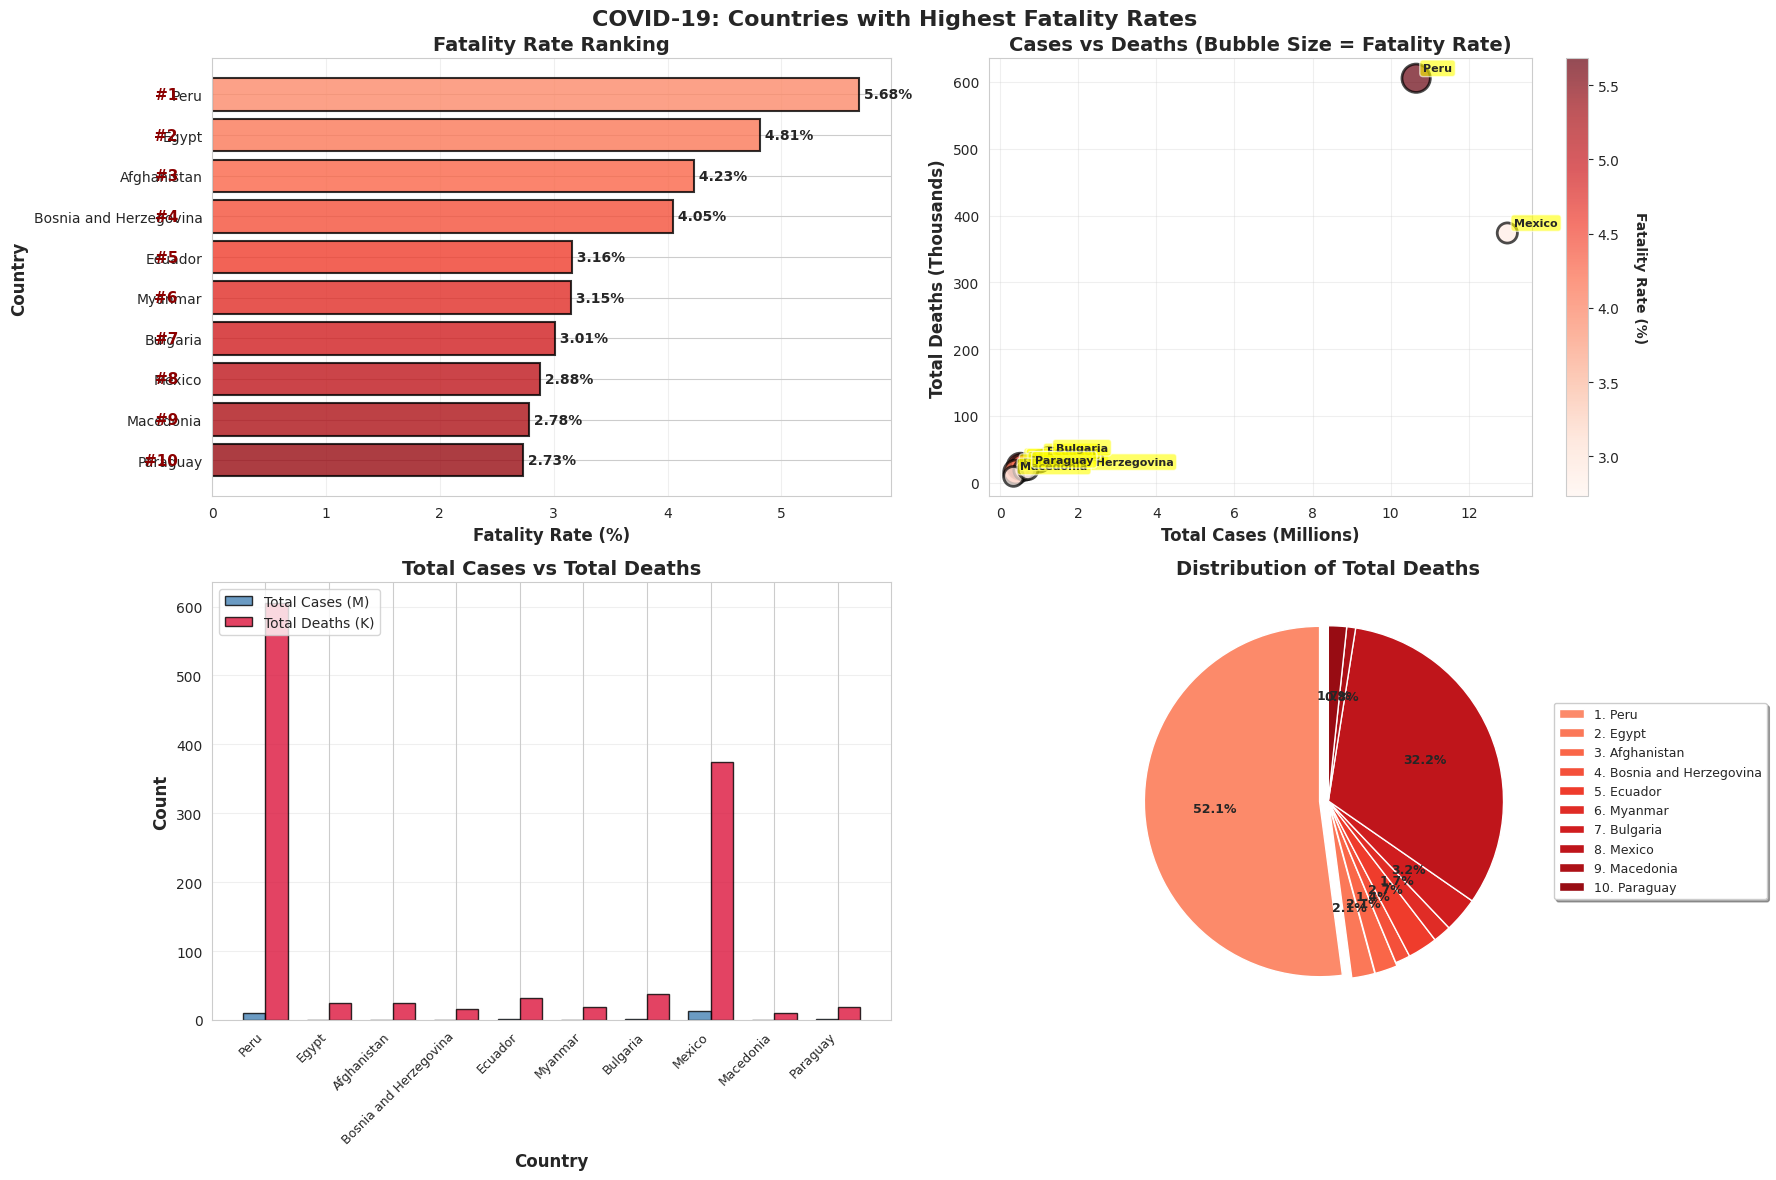


COVID-19 HIGH FATALITY RATE COUNTRIES SUMMARY
Top 10 Countries with Highest Fatality Rates

Rank   Country                             Cases          Deaths   Fatality %
------------------------------------------------------------------------------------------
#1     Peru                           10,651,933         605,474        5.68%
#2     Egypt                             515,348          24,796        4.81%
#3     Afghanistan                       571,742          24,190        4.23%
#4     Bosnia and Herzegovina            397,602          16,104        4.05%
#5     Ecuador                         1,012,089          31,967        3.16%
#6     Myanmar                           617,739          19,441        3.15%
#7     Bulgaria                        1,250,250          37,663        3.01%
#8     Mexico                         12,986,669         373,866        2.88%
#9     Macedonia                         341,889           9,516        2.78%
#10    Paraguay                     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('02_high_fatality_countries.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('COVID-19: Countries with Highest Fatality Rates', fontsize=16, fontweight='bold')

# Plot 1: Horizontal Bar Chart - Fatality Rates
ax1 = axes[0, 0]
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(df)))
bars = ax1.barh(df['country_name'], df['fatality_rate'],
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Fatality Rate (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Country', fontsize=12, fontweight='bold')
ax1.set_title('Fatality Rate Ranking', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels and rank
for i, (country, rate) in enumerate(zip(df['country_name'], df['fatality_rate'])):
    ax1.text(rate, i, f' {rate:.2f}%',
             va='center', fontsize=10, fontweight='bold')
    ax1.text(-0.3, i, f'#{i+1}',
             va='center', ha='right', fontsize=11, fontweight='bold', color='darkred')

# Plot 2: Scatter Plot - Cases vs Deaths (sized by fatality rate)
ax2 = axes[0, 1]
sizes = (df['fatality_rate'] / df['fatality_rate'].min()) * 200
scatter = ax2.scatter(df['total_cases'] / 1e6, df['total_deaths'] / 1000,
                     s=sizes, c=df['fatality_rate'], cmap='Reds',
                     alpha=0.7, edgecolors='black', linewidth=2)

ax2.set_xlabel('Total Cases (Millions)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Deaths (Thousands)', fontsize=12, fontweight='bold')
ax2.set_title('Cases vs Deaths (Bubble Size = Fatality Rate)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add country labels
for _, row in df.iterrows():
    ax2.annotate(row['country_name'],
                xy=(row['total_cases'] / 1e6, row['total_deaths'] / 1000),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6))

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Fatality Rate (%)', rotation=270, labelpad=20, fontweight='bold')

# Plot 3: Grouped Bar Chart - Cases and Deaths
ax3 = axes[1, 0]
x_pos = np.arange(len(df))
width = 0.35

# Normalize for visualization (cases in millions, deaths in thousands)
bars1 = ax3.bar(x_pos - width/2, df['total_cases'] / 1e6, width,
                label='Total Cases (M)', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, df['total_deaths'] / 1000, width,
                label='Total Deaths (K)', color='crimson', alpha=0.8, edgecolor='black')

ax3.set_xlabel('Country', fontsize=12, fontweight='bold')
ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
ax3.set_title('Total Cases vs Total Deaths', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(df['country_name'], rotation=45, ha='right', fontsize=9)
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Pie Chart - Share of Total Deaths
ax4 = axes[1, 1]
colors_pie = plt.cm.Reds(np.linspace(0.4, 0.9, len(df)))
explode = [0.05 if i == 0 else 0.02 if i < 3 else 0 for i in range(len(df))]

wedges, texts, autotexts = ax4.pie(df['total_deaths'],
                                     labels=None,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors_pie,
                                     explode=explode,
                                     textprops={'fontsize': 9, 'fontweight': 'bold'})

ax4.set_title('Distribution of Total Deaths', fontsize=14, fontweight='bold')

# Create legend
legend_labels = [f"{i+1}. {name}" for i, name in enumerate(df['country_name'])]
ax4.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=9, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*90)
print("COVID-19 HIGH FATALITY RATE COUNTRIES SUMMARY")
print("="*90)
print(f"Top {len(df)} Countries with Highest Fatality Rates\n")

print(f"{'Rank':<6} {'Country':<25} {'Cases':>15} {'Deaths':>15} {'Fatality %':>12}")
print("-"*90)
for i, row in df.iterrows():
    rank = i + 1
    print(f"#{rank:<5} {row['country_name']:<25} {row['total_cases']:>15,} "
          f"{row['total_deaths']:>15,} {row['fatality_rate']:>11.2f}%")

print("\n" + "="*90)
print("AGGREGATE STATISTICS")
print("="*90)
print(f"Total Cases (All Countries): {df['total_cases'].sum():>20,}")
print(f"Total Deaths (All Countries): {df['total_deaths'].sum():>19,}")
print(f"Average Fatality Rate: {df['fatality_rate'].mean():>24.2f}%")
print(f"Weighted Avg Fatality Rate: {(df['total_deaths'].sum() / df['total_cases'].sum() * 100):>18.2f}%")
print(f"Median Fatality Rate: {df['fatality_rate'].median():>25.2f}%")

print("\n" + "="*90)
print("HIGHEST IMPACT")
print("="*90)
highest_cases = df.loc[df['total_cases'].idxmax()]
highest_deaths = df.loc[df['total_deaths'].idxmax()]
highest_rate = df.loc[df['fatality_rate'].idxmax()]

print(f"\nMost Cases:")
print(f"  Country: {highest_cases['country_name']}")
print(f"  Total Cases: {highest_cases['total_cases']:,}")
print(f"  Fatality Rate: {highest_cases['fatality_rate']:.2f}%")

print(f"\nMost Deaths:")
print(f"  Country: {highest_deaths['country_name']}")
print(f"  Total Deaths: {highest_deaths['total_deaths']:,}")
print(f"  Fatality Rate: {highest_deaths['fatality_rate']:.2f}%")

print(f"\nHighest Fatality Rate:")
print(f"  Country: {highest_rate['country_name']}")
print(f"  Total Cases: {highest_rate['total_cases']:,}")
print(f"  Total Deaths: {highest_rate['total_deaths']:,}")
print(f"  Fatality Rate: {highest_rate['fatality_rate']:.2f}%")

print("\n" + "="*90)
print("FATALITY RATE CATEGORIES")
print("="*90)
very_high = df[df['fatality_rate'] >= 4.0]
high = df[(df['fatality_rate'] >= 3.0) & (df['fatality_rate'] < 4.0)]
moderate = df[df['fatality_rate'] < 3.0]

print(f"\nVery High (≥4.0%): {len(very_high)} countries")
for _, row in very_high.iterrows():
    print(f"  • {row['country_name']}: {row['fatality_rate']:.2f}%")

print(f"\nHigh (3.0-3.9%): {len(high)} countries")
for _, row in high.iterrows():
    print(f"  • {row['country_name']}: {row['fatality_rate']:.2f}%")

print(f"\nModerate (<3.0%): {len(moderate)} countries")
for _, row in moderate.iterrows():
    print(f"  • {row['country_name']}: {row['fatality_rate']:.2f}%")

print("\n" + "="*90)
print("DEATHS PER CAPITA ANALYSIS (per 1,000 cases)")
print("="*90)
df_sorted = df.sort_values('fatality_rate', ascending=False)
print(f"{'Country':<25} {'Deaths per 1,000 Cases':>25}")
print("-"*90)
for _, row in df_sorted.iterrows():
    deaths_per_1000 = (row['total_deaths'] / row['total_cases']) * 1000
    print(f"{row['country_name']:<25} {deaths_per_1000:>24.2f}")

print("\n" + "="*90)
print("REGIONAL CONTEXT")
print("="*90)
regions = {
    'Latin America': ['Peru', 'Ecuador', 'Mexico', 'Paraguay'],
    'Asia': ['Afghanistan', 'Myanmar'],
    'Middle East/Africa': ['Egypt'],
    'Europe': ['Bosnia and Herzegovina', 'Bulgaria', 'Macedonia']
}

for region, country_list in regions.items():
    region_data = df[df['country_name'].isin(country_list)]
    if len(region_data) > 0:
        print(f"\n{region}:")
        print(f"  Countries: {len(region_data)}")
        print(f"  Avg Fatality Rate: {region_data['fatality_rate'].mean():.2f}%")
        print(f"  Total Deaths: {region_data['total_deaths'].sum():,}")

print("="*90)

**Countries with Fastest COVID-19 Case Decline Patterns**

Analysis of COVID-19 case decline patterns across multiple countries (Brazil, India, Philippines,
Russia) showing daily cases and percentage of peak over time. Features timeline comparisons, peak
analysis, and post-peak decline trajectories. Tracks how quickly countries descended from their
peak case numbers, with metrics including days to 50% and 75% decline from peak. Visualizes both
absolute daily cases and normalized percentage views to compare decline rates across different-sized
outbreaks, revealing varied recovery patterns and pandemic wave dynamics.

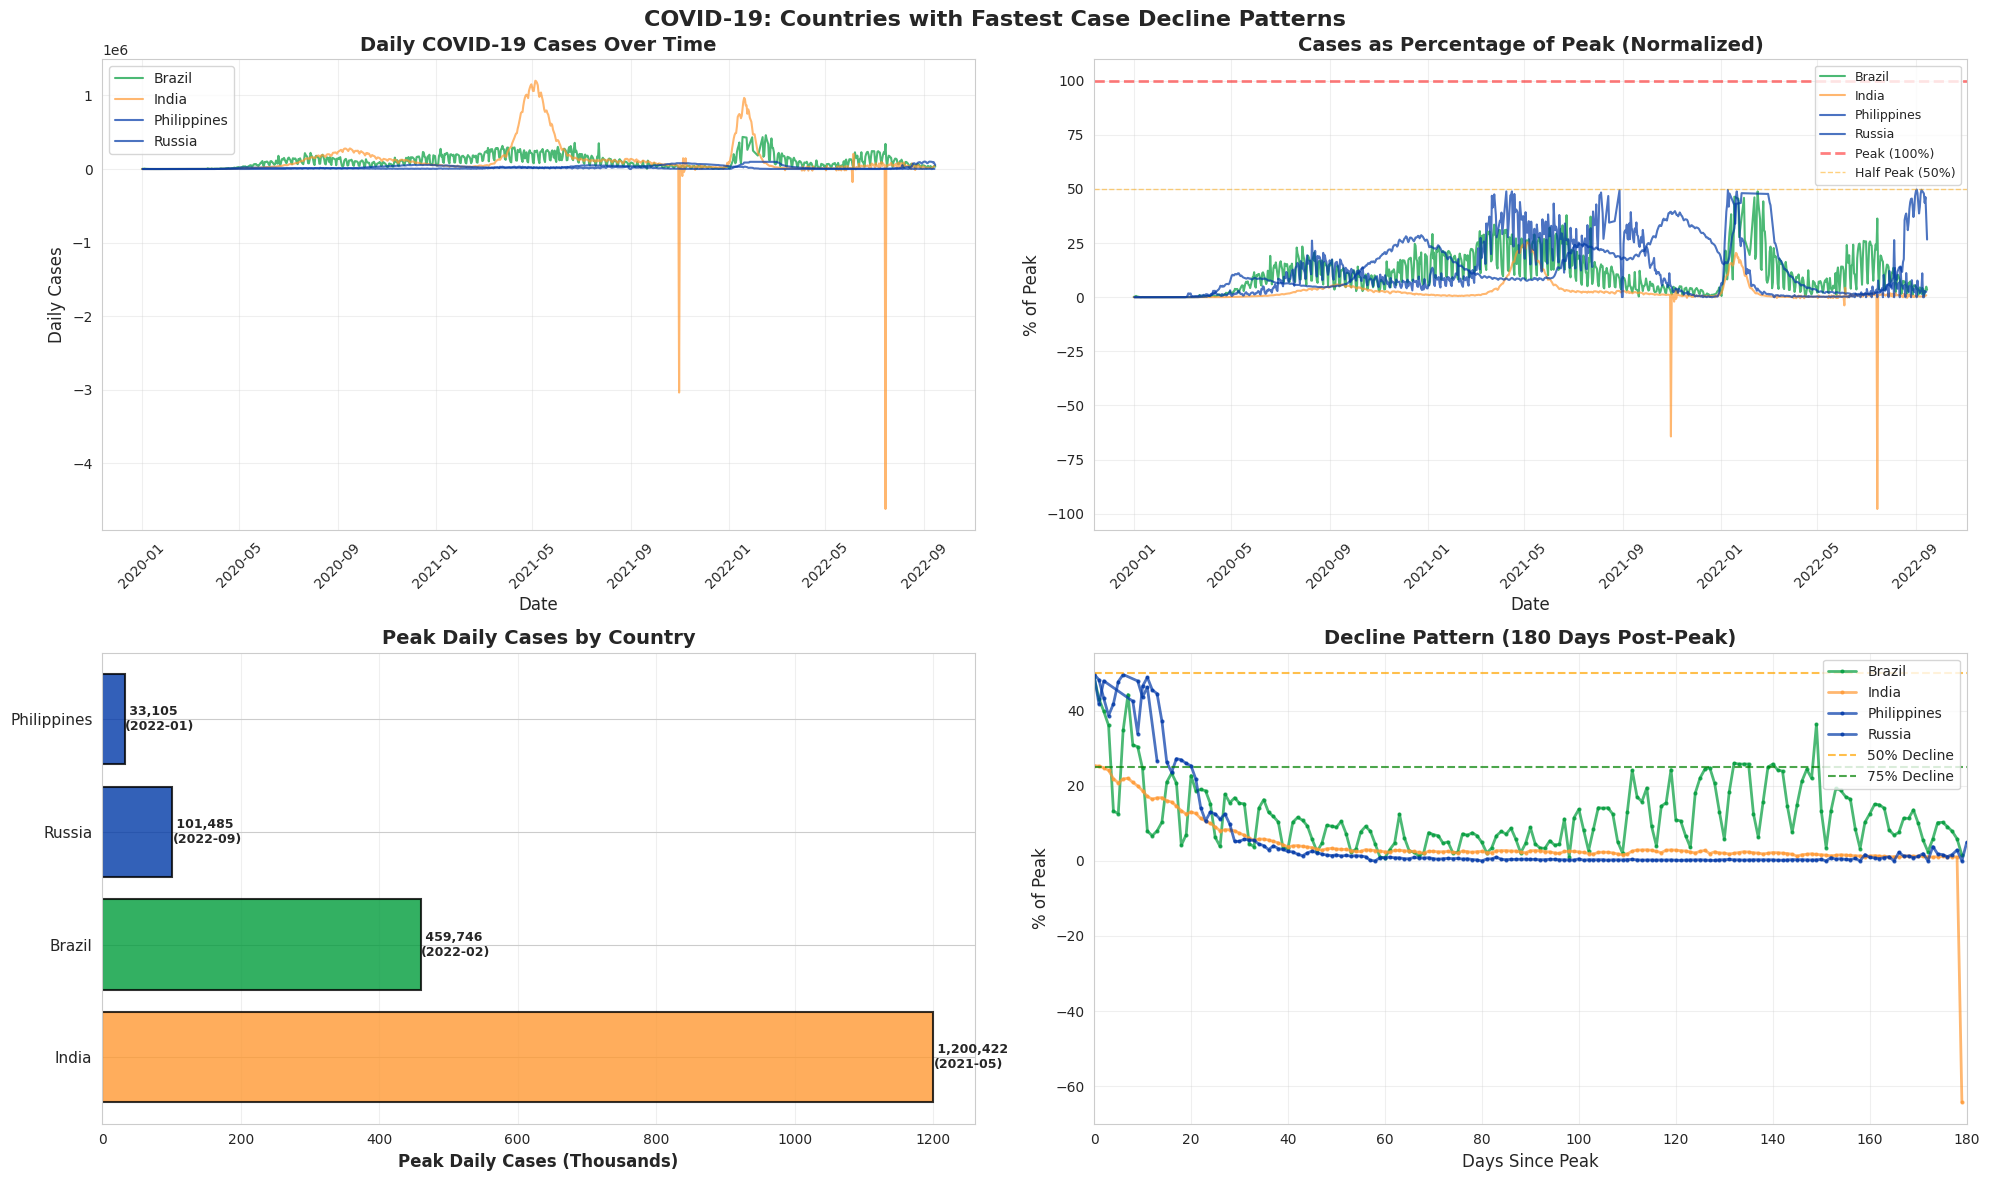


COVID-19 DECLINE PATTERN ANALYSIS

BRAZIL
------------------------------------------------------------------------------------------
  Peak Cases: 459,746 on 2022-02-16
  Average Daily Cases: 101,453
  Median Daily Cases: 82,407
  Days to 50% Decline: 0 days
  Days to 75% Decline: 4 days

INDIA
------------------------------------------------------------------------------------------
  Peak Cases: 1,200,422 on 2021-05-05
  Average Daily Cases: 123,341
  Median Daily Cases: 53,713
  Days to 50% Decline: 0 days
  Days to 75% Decline: 2 days

PHILIPPINES
------------------------------------------------------------------------------------------
  Peak Cases: 33,105 on 2022-01-10
  Average Daily Cases: 6,767
  Median Daily Cases: 3,661
  Days to 50% Decline: 0 days
  Days to 75% Decline: 16 days

RUSSIA
------------------------------------------------------------------------------------------
  Peak Cases: 101,485 on 2022-09-02
  Average Daily Cases: 28,228
  Median Daily Cases: 19,164
  D

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('03_countries_with_fastest_decline.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Set style
sns.set_style("whitegrid")

# Get unique countries
countries = df['country_name'].unique()

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('COVID-19: Countries with Fastest Case Decline Patterns', fontsize=16, fontweight='bold')

# Plot 1: Daily Cases Timeline - All Countries
ax1 = axes[0, 0]
colors = {'Brazil': '#009c3b', 'India': '#ff9933', 'Philippines': '#0038a8',
          'Russia': '#0039a6', 'United States of America': '#b22234'}

for country in countries:
    country_data = df[df['country_name'] == country]
    color = colors.get(country, 'gray')
    ax1.plot(country_data['date'], country_data['daily_cases'],
             label=country, linewidth=1.5, alpha=0.7, color=color)

ax1.set_title('Daily COVID-19 Cases Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Daily Cases', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Percentage of Peak - Normalized View
ax2 = axes[0, 1]
for country in countries:
    country_data = df[df['country_name'] == country]
    color = colors.get(country, 'gray')
    ax2.plot(country_data['date'], country_data['pct_of_peak'],
             label=country, linewidth=1.5, alpha=0.7, color=color)

ax2.set_title('Cases as Percentage of Peak (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('% of Peak', fontsize=12)
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Peak (100%)')
ax2.axhline(y=50, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Half Peak (50%)')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Peak Analysis - Bar Chart
ax3 = axes[1, 0]
peak_data = []
for country in countries:
    country_data = df[df['country_name'] == country]
    peak_cases = country_data['daily_cases'].max()
    peak_date = country_data.loc[country_data['daily_cases'].idxmax(), 'date']
    peak_data.append({'country': country, 'peak_cases': peak_cases, 'peak_date': peak_date})

peak_df = pd.DataFrame(peak_data).sort_values('peak_cases', ascending=False)
bars = ax3.barh(range(len(peak_df)), peak_df['peak_cases'] / 1000,
                color=[colors.get(c, 'gray') for c in peak_df['country']],
                alpha=0.8, edgecolor='black', linewidth=1.5)

ax3.set_yticks(range(len(peak_df)))
ax3.set_yticklabels(peak_df['country'], fontsize=11)
ax3.set_xlabel('Peak Daily Cases (Thousands)', fontsize=12, fontweight='bold')
ax3.set_title('Peak Daily Cases by Country', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (country, cases, date) in enumerate(zip(peak_df['country'], peak_df['peak_cases'], peak_df['peak_date'])):
    ax3.text(cases / 1000, i, f' {cases:,.0f}\n({date.strftime("%Y-%m")})',
             va='center', fontsize=9, fontweight='bold')

# Plot 4: Decline Pattern - Focus on Post-Peak
ax4 = axes[1, 1]

for country in countries:
    country_data = df[df['country_name'] == country].sort_values('date')

    # Find peak index
    peak_idx = country_data['daily_cases'].idxmax()
    peak_date = country_data.loc[peak_idx, 'date']

    # Get data from peak onwards (first 180 days)
    post_peak = country_data[country_data['date'] >= peak_date].head(180).copy()
    post_peak['days_since_peak'] = (post_peak['date'] - peak_date).dt.days

    color = colors.get(country, 'gray')
    ax4.plot(post_peak['days_since_peak'], post_peak['pct_of_peak'],
             label=country, linewidth=2, alpha=0.7, color=color, marker='o', markersize=2)

ax4.set_title('Decline Pattern (180 Days Post-Peak)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Days Since Peak', fontsize=12)
ax4.set_ylabel('% of Peak', fontsize=12)
ax4.axhline(y=50, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='50% Decline')
ax4.axhline(y=25, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='75% Decline')
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 180)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*90)
print("COVID-19 DECLINE PATTERN ANALYSIS")
print("="*90)

for country in countries:
    country_data = df[df['country_name'] == country].sort_values('date')

    print(f"\n{country.upper()}")
    print("-"*90)

    # Peak information
    peak_cases = country_data['daily_cases'].max()
    peak_date = country_data.loc[country_data['daily_cases'].idxmax(), 'date']
    print(f"  Peak Cases: {peak_cases:,} on {peak_date.strftime('%Y-%m-%d')}")

    # Average cases
    print(f"  Average Daily Cases: {country_data['daily_cases'].mean():,.0f}")
    print(f"  Median Daily Cases: {country_data['daily_cases'].median():,.0f}")

    # Decline analysis
    post_peak = country_data[country_data['date'] >= peak_date]

    # Days to 50% of peak
    half_peak = post_peak[post_peak['pct_of_peak'] <= 50]
    if len(half_peak) > 0:
        days_to_half = (half_peak.iloc[0]['date'] - peak_date).days
        print(f"  Days to 50% Decline: {days_to_half} days")

    # Days to 25% of peak
    quarter_peak = post_peak[post_peak['pct_of_peak'] <= 25]
    if len(quarter_peak) > 0:
        days_to_quarter = (quarter_peak.iloc[0]['date'] - peak_date).days
        print(f"  Days to 75% Decline: {days_to_quarter} days")

print("\n" + "="*90)
print("PEAK COMPARISON")
print("="*90)
peak_summary = []
for country in countries:
    country_data = df[df['country_name'] == country]
    peak_cases = country_data['daily_cases'].max()
    peak_summary.append((country, peak_cases))

peak_summary.sort(key=lambda x: x[1], reverse=True)
print(f"\n{'Rank':<6} {'Country':<30} {'Peak Daily Cases':>20}")
print("-"*90)
for i, (country, cases) in enumerate(peak_summary, 1):
    print(f"#{i:<5} {country:<30} {cases:>20,}")

print("\n" + "="*90)
print("DATA COVERAGE")
print("="*90)
for country in countries:
    country_data = df[df['country_name'] == country]
    start_date = country_data['date'].min()
    end_date = country_data['date'].max()
    days = (end_date - start_date).days
    print(f"{country:<30}: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')} ({days} days)")

print("="*90)